# EE 202 Course Project
Team Members - Amogh Dixit (190002004) <br>
               Bhavyash Gautam (190002013)<br>
               Vineet Tripathi (190002068)


### Yanny vs Laurel Explanation
### Using Fourier Transforms to comprehend differences in human auditory perception

<p>In this project, we will attempt to explain how Fourier Transform can help us understand human sounds. A few years back, an audio clip Yanny/Laurel went viral after first appearing on Reddit. Everyone seemed to have the same question, "How can someone hear Laurel, it's clearly Yanny!". Several people came up with different explanations to assert why different people heard different sounds. We'll try to process this audio file and analyze it in every possible aspect to highlight the "Laurel" or "Yanny" perceptions.</p>

In [144]:
# First of all, we will import all the libraries required for doing this project. Scipy and Numpy provide functions for performing
# operations and packages like matplotlib and seaborn provide functions for plotting.

import scipy.io.wavfile as wavfile
import numpy as np
from scipy.fftpack import fft,fftfreq
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
# We use the open function to read the audio file
with open( "laurel_yanny.wav" , "rb" ) as f :
    sampleRate,data = wavfile.read(f)

In [146]:
len(data) # measuring the number of entries in the dataset

43008

In [147]:
sampleRate #  sample rate is the number of times the signal is measured in a second

44100

In [148]:
duration  = len(data)/sampleRate # we can find the  length of the singal by this formula

In [149]:
print(duration)

0.9752380952380952


<h6> We find the time coordinates by using arange function which divides length between 2 numbers in a given number of steps</h6> 

In [150]:
x = np.arange(0, duration,duration/len(data))

Text(0, 0.5, 'Amplitude')

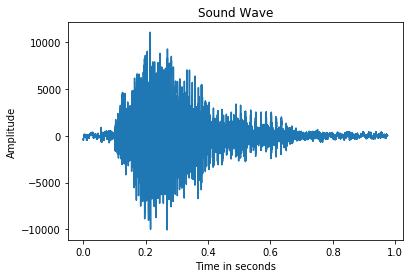

In [151]:
plt.plot(x,data)
plt.title("Sound Wave")
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")

<h5>Fourier Transform</h5>
<p> Now we will apply fourier transform to our dataset and further we plot it and observe the present frequencies</p>

Text(0, 0.5, 'Magnitude of fourier Coefficient')

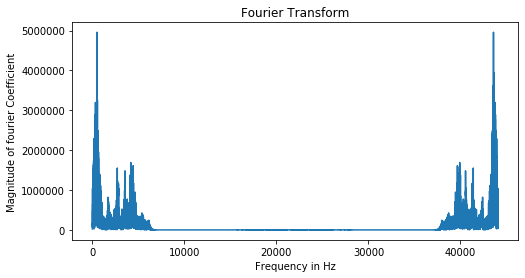

In [152]:
sp = fft(data) 
timestep = 1/sampleRate
freq = fftfreq(n=data.shape[0], d=timestep) 
plt.figure(figsize = (8,4))
plt.plot(np.arange(len(sp))/duration, abs(sp)) # we neglect the negative regions as we are only interested in find peaks
plt.title("Fourier Transform")
plt.xlabel("Frequency in Hz")
plt.ylabel("Magnitude of fourier Coefficient")

<h4> We will now filter the wave according to frequencies, so that we can get the desired range. We will segregate by using a threshold for filtering the upper and lower regions. Then we will multiply it with the already obtained transform to obtain the desired fourier transform by removing frequencies not required. In the next step, we will apply the Inverse FFT to obtain the desired signal </h4>

In [153]:
# this function is defined in order to save the file
def writeWavFile(data, filename, sampleRate):
    data1 = (data* 1/np.max(abs(data)) * 32767).astype(np.int16)
    with open(filename + '.wav', 'wb') as f:
        wavfile.write(f, sampleRate, data1)

In [154]:
def filter_freq(limit,freq):
    if limit == 'higher':
        a = 0
        b = 1
    if limit == 'lower':
        a = 1
        b = 0
# we will segregate the fft into different parts according to the desired frequency 
    p1 = a*sp[0:freq]
    p2 = b*sp[freq:-freq]
    p3 = a*sp[-freq:]
# we will now sum up the different parts
    p = p1.copy()
    p = np.concatenate([p1,p2,p3],axis = 0)
    plt.plot(np.arange(len(sp))/duration, abs(p))
    plt.xlabel('Frequency [Hz]', fontsize = 15)
    plt.title(limit + " Thresholded signal FFT")
    plt.ylabel('Magnitude of fourier coefficients')
    test_o = np.fft.ifft(p)

    # audio signal written to current directory for listening
    plt.figure()
    plt.plot(test_o)
    plt.xlabel('time steps')
    plt.ylabel('Modified Signal')
    fname = 'test'+limit
    writeWavFile(test_o, fname, sampleRate)

D:\programs\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


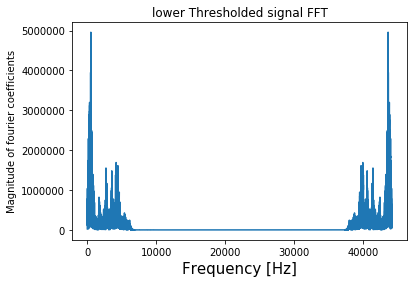

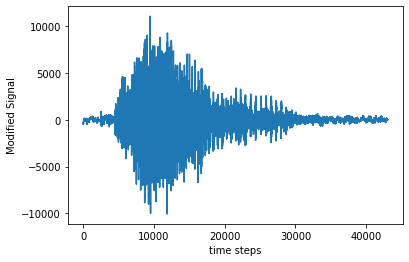

In [155]:
# Let us try to find the threshold for clear differentitaion between Laurel and Yanny
threshold =  10000
freqThreshold = 10000/duration
filter_freq('lower', threshold)
IPython.display.Audio("testlower.wav")

D:\programs\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


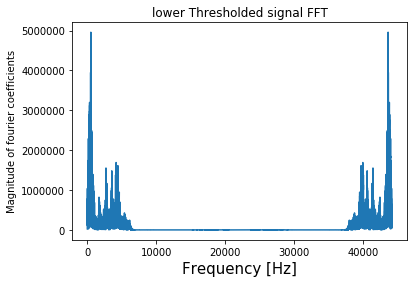

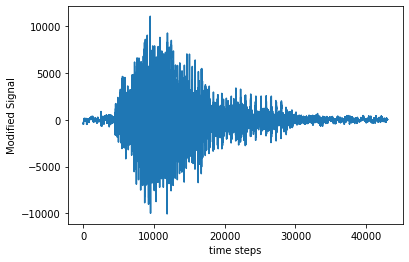

In [156]:
threshold =  20000
freqThreshold = 20000/duration
# Now we will plot the desired FFT, signal and find the audio wav files for laurel and Yanny respectively 
filter_freq('lower', threshold)
import IPython
IPython.display.Audio("testlower.wav")

# we can hear and find out that this is moving futher away from the desired differentiation for hearing laurel

D:\programs\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


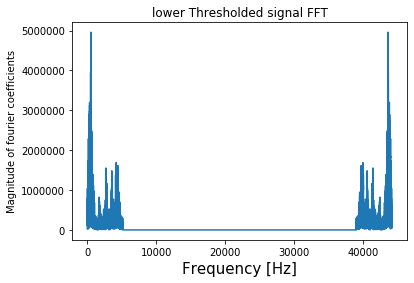

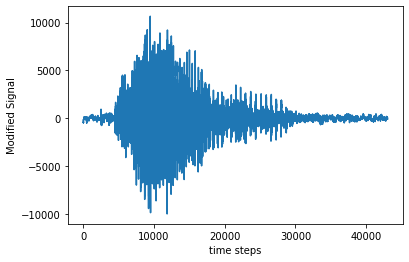

In [157]:
threshold =  5000
freqThreshold = 5000/duration
# Now we will plot the desired FFT, signal and find the audio wav files for laurel and Yanny respectively 
filter_freq('lower', threshold)
import IPython
IPython.display.Audio("testlower.wav")

# we can hear and find out that this is moving closer towards the desired differentiation for hearing laurel

D:\programs\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


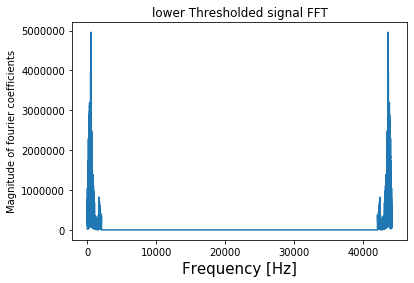

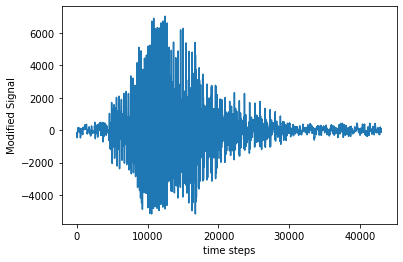

In [158]:
# We tried different threshold until we obtain the required 2 different audio for Laurel and Yanny
# after trying different values, we come to a conclusion that we can choose the threshold to be 2Khz
threshold =  2000
freqThreshold = 2000/duration
# Now we will plot the desired FFT, signal and find the audio wav files for Laurry and Yanny respectively 
filter_freq('lower', threshold)
IPython.display.Audio("testlower.wav")


2050.78125


D:\programs\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


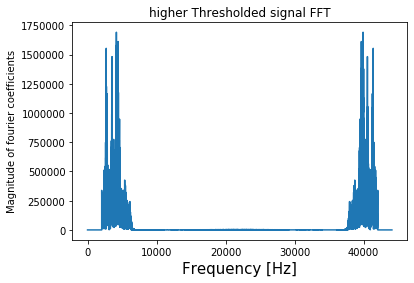

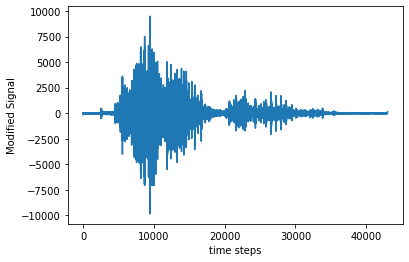

In [159]:
# Now we will get the desired signal for Yanny by removing the lower frequencies and applying Inverse FFT
threshold =  2000
freqThreshold = 2000/duration
print(freqThreshold)
filter_freq('higher', threshold)
IPython.display.Audio("testhigher.wav")


<h2><b><i>Spectrogram</h2></b></i>
<p> Now we will discuss the role of Spectrogram. It helps in plotting how strong frequencies are present with the help of third variable in a heatmap. Since by applying Fourier Transform, we lose the the track of time, it will help us in recovering the track of time as well as the frequencies present.</p>
<p>To perform this, we will apply finite DFT on smaller regions and then plot them to gain maximum information. Hence, we take 300 as width of windows to perform DFT. Then we compute DFT for these regions, the calculation till the 60th fourier coefficient is done in every window.</p>

Text(0.5, 1.0, 'Heatmap of (Fourier Coeffs.)')

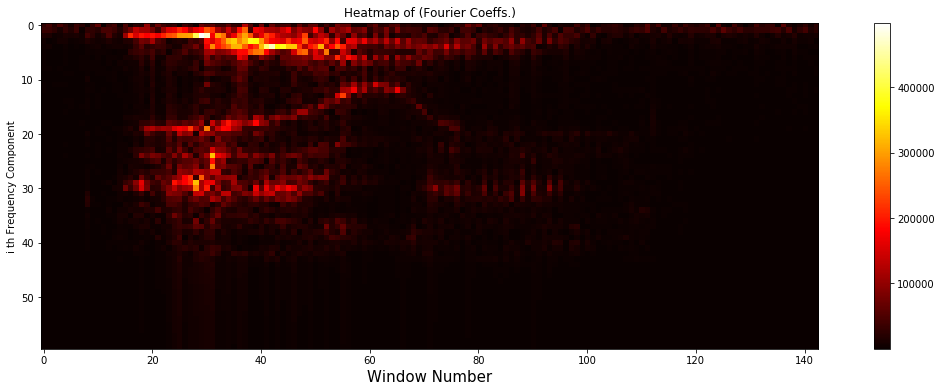

In [160]:
no_windows = (int(len(data)/300)) # calculate the number of windows
stft = np.zeros((60, no_windows))  # make an empty matrix to store stft
for i in range(no_windows):
    start = i*300
    end = 300 + start
    coeff = abs(fft(data[start:end]))[0:60].reshape(60,).astype(int)
    stft[:, i] = coeff

plt.figure(figsize = (20,6))
plt.imshow(stft, cmap = 'hot')
plt.colorbar()
plt.xlabel('Window Number', fontsize = 15)
plt.ylabel('i th Frequency Component', )
plt.title('Heatmap of (Fourier Coeffs.)' )
#Energy is getting transferred from lower to higher frequency with time for “lower” frequency range (freq
# 20th component freq) and the transfer reverses direction after some time (after window number  50 something). 
# Reverse energy transfer observed for frequencies in the 20th-50th bound.

<h3>Conclusion</h3>
<p> We were able to differentiate between a sample audio file which is interpreted as Yanny by some and Laurel depending on the sample rate and human perception ability. We used Fourier Transform to our advantage and found out the frequencies for each sound. Then we applied a method to separate the frequencies and then applied inverse FFT to go back to the time domain</p>
<h5> We also analyzed the energy of Spectrum using the spectrogram </h5>